### IMEC2543 - DINAMICA DE MAQUINARIA
### [Luis Alejandro Rodríguez Arenas](https://luigitoby.github.io/) Cod. 202321287
# Taller 1

In [1]:
import numpy as np
from numpy import deg2rad, rad2deg
from sympy import symbols, pi, sin, cos, lambdify, solve, linear_eq_to_matrix, simplify, acos, sqrt, rad
import sympy as sp
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, express
from scipy import optimize
from scipy.optimize import fsolve
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Paso -1 - Hacer los dibujos y diagramas necesarios


# Paso 0 -  Establecer variables
Vamos a establecer las variables que necesitaremos a lo largo del ejercicio

In [2]:
l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, mJ, mK, mL, mM, mN, mO, mP, mQ, g, t = symbols('l1 l2 l3 l4 l5 l6 l7 l8 l9 l10 mJ mK mL mM mN mO mP mQ g t')

theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8 = dynamicsymbols('theta1 theta2 theta3 theta4 theta5 theta6 theta7 theta8')


# ---- Cuerpo K ----
F_TKx, F_TKy, M_in2 = symbols('F_TKx F_TKy M_in2')

# ---- Cuerpo J ----
F_TJx, F_TJy, M_in1 = symbols('F_TJx F_TJy M_in1')

# ---- Cuerpo L ----
F_KLx, F_KLy = symbols('F_KLx F_KLy')

# ---- Cuerpo M ----
F_TMx, F_TMy = symbols('F_TMx F_TMy')

# ---- Cuerpo O ----
F_NOx, F_NOy = symbols('F_NOx F_NOy')

# ---- Cuerpo P ----
F_QPx, F_QPy = symbols('F_QPx F_QPy')
F_JPx, F_JPy = symbols('F_JPx F_JPy')
F_LPx, F_LPy = symbols('F_LPx F_LPy')

# ---- Cuerpo Q ----
F_OQx, F_OQy = symbols('F_OQx F_OQy')

# ---- Cuerpo N ----
F_JNx, F_JNy = symbols('F_JNx F_JNy')
F_MNx, F_MNy = symbols('F_MNx F_MNy')


params={l1: 0.035, l2: 0.08, l3: 0.08, l4: 0.035, l5: 0.02, l6: 0.02, l7: 0.04, l8: 0.046254, l9: 0.01723, l10: 0.0361, mJ: 0.0141, mK: 0.0029, mL: 0.0029, mM: 0.0029, mN: 0.0035, mO: 0.0029, mP: 0.0096, mQ: 0.0062, g: 9.81}

T=ReferenceFrame('T')

J=T.orientnew('J','Axis',(theta1,T.z))
K=T.orientnew('K','Axis',(theta2,T.z))
L=T.orientnew('L','Axis',(theta3,T.z))
M=T.orientnew('M','Axis',(theta4,T.z))
N=T.orientnew('N','Axis',(theta5,T.z))
O=T.orientnew('O','Axis',(theta6,T.z))
P=T.orientnew('P','Axis',(theta7,T.z))
Q=T.orientnew('Q','Axis',(theta8,T.z))

# V=N.orientnew('V','Axis',(95*pi/180,N.z))
# rBG = l6*V.x

rBG = l6*(cos(95*pi/180)*N.x + sin(95*pi/180)*N.y)

# W=N.orientnew('W','Axis',(-deg2rad(25.515),N.z))

rAB = l2*J.x
rAC = l1*K.x
rCD = l3*L.x
############
rBD = l4*P.x
rIB = l3*P.x
############
rIH = l5*Q.x
rHG = l3*O.x
############
rBF = l7*N.x
# rGF = l8*W.x
##########
rEF = l3*M.x
rAE = l10*T.x+l9*T.y

eqLoop1 = rAB+rBD-rCD-rAC
eqLoop2 = rAB+rBF-rEF-rAE
eqLoop3 = -rIB+rIH+rHG-rBG

eqLoop1 = eqLoop1.subs(params)
eqLoop2 = eqLoop2.subs(params)
eqLoop3 = eqLoop3.subs(params)

### Pequeño código para verificar gráficamente que los loops cierran

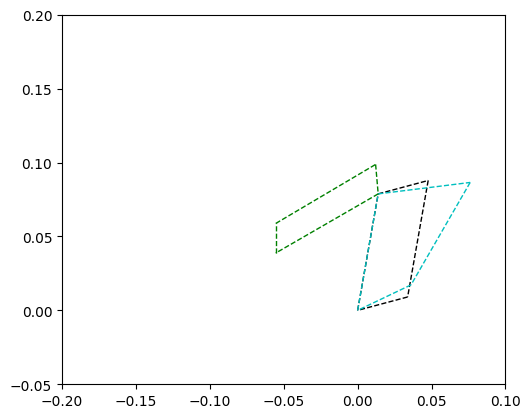

In [3]:
points={'A': 0*T.x, 'B': rAB, 'C': rAC, 'D': rAC+rCD, 'E': rAE, 'F': rAE+rEF, 'G': rAB+rBG, 'H': rAB-rIB+rIH, 'I': rAB-rIB}
points_fun={k:lambdify([theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8],[v.dot(T.x).subs(params),v.dot(T.y).subs(params)]) for k,v in points.items()}

def plotMechanism(joint_values,ax=None):    
    A=points_fun['A'](*joint_values) # Operador de unpacking, es decir, toma la lista de joint_values y los pasa como argumentos a la función de cada punto
    B=points_fun['B'](*joint_values)
    C=points_fun['C'](*joint_values)
    D=points_fun['D'](*joint_values)
    E=points_fun['E'](*joint_values)
    F=points_fun['F'](*joint_values)
    G=points_fun['G'](*joint_values)
    H=points_fun['H'](*joint_values)
    I=points_fun['I'](*joint_values)    

    if ax is None:
        ax=plt.figure().add_subplot(111)
        # -------- DRAW LOOP 1 --------
    # A -> B -> D -> C -> A
    ax.plot([A[0], B[0]], [A[1], B[1]], 'k--', linewidth=1)
    ax.plot([B[0], D[0]], [B[1], D[1]], 'k--', linewidth=1)
    ax.plot([D[0], C[0]], [D[1], C[1]], 'k--', linewidth=1)
    ax.plot([C[0], A[0]], [C[1], A[1]], 'k--', linewidth=1)

    # -------- DRAW LOOP 2 --------
    # A -> B -> F -> E -> A
    ax.plot([A[0], B[0]], [A[1], B[1]], 'c--', linewidth=1)
    ax.plot([B[0], F[0]], [B[1], F[1]], 'c--', linewidth=1)
    ax.plot([F[0], E[0]], [F[1], E[1]], 'c--', linewidth=1)
    ax.plot([E[0], A[0]], [E[1], A[1]], 'c--', linewidth=1)

    # -------- DRAW LOOP 3 --------
    # B -> I -> H -> G -> B
    ax.plot([B[0], I[0]], [B[1], I[1]], 'g--', linewidth=1)
    ax.plot([I[0], H[0]], [I[1], H[1]], 'g--', linewidth=1)
    ax.plot([H[0], G[0]], [H[1], G[1]], 'g--', linewidth=1)
    ax.plot([G[0], B[0]], [G[1], B[1]], 'g--', linewidth=1)

    ax.set_aspect('equal')
    ax.set_xlim(-0.2,0.1)
    ax.set_ylim(-0.05,0.2)

# Chekeo rápido para ver si funciona la función de plot
plotMechanism([np.deg2rad(80),np.deg2rad(15),np.deg2rad(80),np.deg2rad(60),np.deg2rad(0),np.deg2rad(30),np.deg2rad(30),np.deg2rad(90)])


In [4]:
BF = rBF.subs(params)
BG = rBG.subs(params)

angle = acos(
    (BF.dot(BG)) / (sqrt(BF.dot(BF)) * sqrt(BG.dot(BG)))
)

angle = simplify(angle)

display(angle)

rad2deg(float(angle))

acos(-1.0*sin(pi/36))

np.float64(95.0)

In [5]:
eqs = [
    eqLoop1.dot(T.x),
    eqLoop1.dot(T.y),
    eqLoop2.dot(T.x),
    eqLoop2.dot(T.y),
    eqLoop3.dot(T.x),
    eqLoop3.dot(T.y)
]

eqs_fun = lambdify(
    (theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8),
    eqs,
    modules="numpy"
)

# Paso 1  - FK
Como hemos visto en clase el paso 1 es realizar el FK del mecanísmo, pues este nos permitirá en el futuro determinar la posición final del efector daondole los valores de valores de $\theta$, $\dot{\theta}$ y $\dot{\theta}$ 

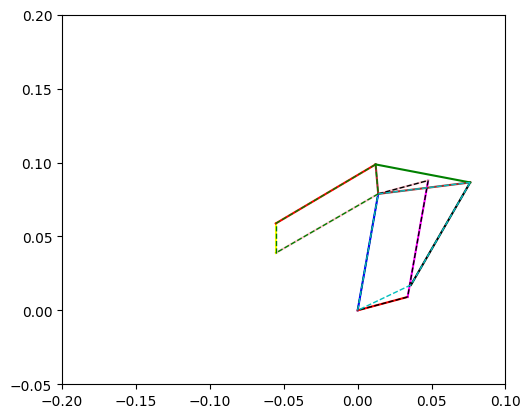

In [6]:
points={'A': 0*T.x, 'B': rAB, 'C': rAC, 'D': rAC+rCD, 'E': rAE, 'F': rAE+rEF, 'G': rAB+rBG, 'H': rAB-rIB+rIH, 'I': rAB-rIB}
points_fun={k:lambdify([theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8],[v.dot(T.x).subs(params),v.dot(T.y).subs(params)]) for k,v in points.items()}

def plotMechanism(joint_values,ax=None):    
    A=points_fun['A'](*joint_values) # Operador de unpacking, es decir, toma la lista de joint_values y los pasa como argumentos a la función de cada punto
    B=points_fun['B'](*joint_values)
    C=points_fun['C'](*joint_values)
    D=points_fun['D'](*joint_values)
    E=points_fun['E'](*joint_values)
    F=points_fun['F'](*joint_values)
    G=points_fun['G'](*joint_values)
    H=points_fun['H'](*joint_values)
    I=points_fun['I'](*joint_values)    

    if ax is None:
        ax=plt.figure().add_subplot(111)
    ax.plot([A[0],B[0]], [A[1],B[1]], 'BLUE')
    ax.plot([A[0],C[0]], [A[1],C[1]], 'red')
    ax.plot([C[0],D[0]], [C[1],D[1]], 'magenta')
    ax.plot([B[0],D[0]], [B[1],D[1]], 'pink')
    ax.plot([B[0],I[0]], [B[1],I[1]], 'pink')
    ax.plot([I[0],H[0]], [I[1],H[1]], 'yellow')
    ax.plot([H[0],G[0]], [H[1],G[1]], 'red')
    ax.plot([B[0],G[0]], [B[1],G[1]], 'brown')
    ax.plot([E[0],F[0]], [E[1],F[1]], 'black') 
    ax.plot([B[0],F[0]], [B[1],F[1]], 'brown')
    ax.plot([G[0],F[0]], [G[1],F[1]], 'green')
    
        # -------- DRAW LOOP 1 --------
    # A -> B -> D -> C -> A
    ax.plot([A[0], B[0]], [A[1], B[1]], 'k--', linewidth=1)
    ax.plot([B[0], D[0]], [B[1], D[1]], 'k--', linewidth=1)
    ax.plot([D[0], C[0]], [D[1], C[1]], 'k--', linewidth=1)
    ax.plot([C[0], A[0]], [C[1], A[1]], 'k--', linewidth=1)

    # -------- DRAW LOOP 2 --------
    # A -> B -> F -> E -> A
    ax.plot([A[0], B[0]], [A[1], B[1]], 'c--', linewidth=1)
    ax.plot([B[0], F[0]], [B[1], F[1]], 'c--', linewidth=1)
    ax.plot([F[0], E[0]], [F[1], E[1]], 'c--', linewidth=1)
    ax.plot([E[0], A[0]], [E[1], A[1]], 'c--', linewidth=1)

    # -------- DRAW LOOP 3 --------
    # B -> I -> H -> G -> B
    ax.plot([B[0], I[0]], [B[1], I[1]], 'g--', linewidth=1)
    ax.plot([I[0], H[0]], [I[1], H[1]], 'g--', linewidth=1)
    ax.plot([H[0], G[0]], [H[1], G[1]], 'g--', linewidth=1)
    ax.plot([G[0], B[0]], [G[1], B[1]], 'g--', linewidth=1)

    ax.set_aspect('equal')
    ax.set_xlim(-0.2,0.1)
    ax.set_ylim(-0.05,0.2)

# Chekeo rápido para ver si funciona la función de plot
plotMechanism([np.deg2rad(80),np.deg2rad(15),np.deg2rad(80),np.deg2rad(60),np.deg2rad(0),np.deg2rad(30),np.deg2rad(30),np.deg2rad(90)])


### Nota sobre el dibujo de arriba
En este las proporciones estan locas porque puse los angulos a ojo para ver cual podría ser un buen first guess, entonces que no cunda el pánico.

In [7]:
def FK(theta1_val, theta2_val, guess):
    """
    Resuelve la cinemática directa encontrando los ángulos desconocidos
    que minimizan el error de cierre geométrico.
    
    theta1_val, theta2_val  -> DOF impuestos
    guess                   -> estimación inicial de [theta3,...,theta8]
    """

    # -------------------------------------------------
    # 1) Definimos el RESIDUAL (error geométrico)
    # -------------------------------------------------
    def residual(theta_u):
        theta3, theta4, theta5, theta6, theta7, theta8 = theta_u
        
        r = eqs_fun(
            theta1_val,
            theta2_val,
            theta3,
            theta4,
            theta5,
            theta6,
            theta7,
            theta8
        )
        
        return np.array(r, dtype=float)

    # -------------------------------------------------
    # 2) Definimos el COSTO escalar = ||r||^2
    # -------------------------------------------------
    def cost(theta_u):
        r = residual(theta_u)
        return np.dot(r, r)   # suma de cuadrados

    # -------------------------------------------------
    # 3) Minimizamos el costo
    # -------------------------------------------------
    result = minimize(
        cost,
        x0=guess,
        method='BFGS',
        options={
            'maxiter': 10000,
            'gtol': 1e-8,
            'disp': True   # para VER la iteración
        }
    )

    # -------------------------------------------------
    # 4) Verificamos convergencia
    # -------------------------------------------------
    if not result.success:
        print("No convergió.")
        print("Costo final:", result.fun)
        raise RuntimeError(result.message)

    print("Convergió.")
    print("Costo final:", result.fun)
    print("Norma residual:", np.sqrt(result.fun))

    return result.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 427
         Gradient evaluations: 61
Convergió.
Costo final: 1.1490557084578439e-14
Norma residual: 1.0719401608568661e-07


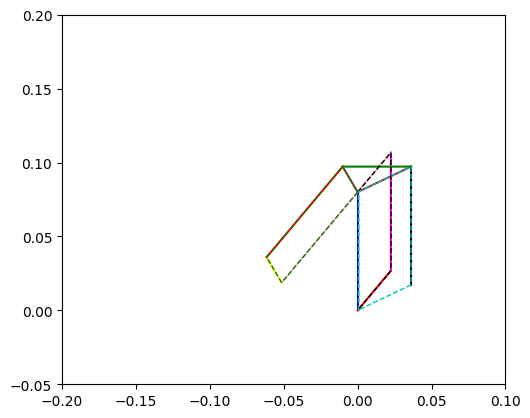

In [8]:
theta1_val = np.deg2rad(90)
theta2_val = np.deg2rad(50)

guess = [
    np.deg2rad(30),
    np.deg2rad(30),
    np.deg2rad(30),
    np.deg2rad(30),
    np.deg2rad(30),
    np.deg2rad(90)
]

theta_u_sol = FK(theta1_val, theta2_val, guess)

joint_values = [theta1_val, theta2_val, *theta_u_sol]
plotMechanism(joint_values)
plt.show()

# Paso 1.1  - Animación del mecanismo
Ahora que tenemos un código sólido donde es claro que el mecanismo cierra, ¡Podemos proceder a animarlo!

In [9]:
theta1_min = rad(90)
theta1_max = rad(160)
theta2_min = rad(0)
theta2_max = rad(90)

In [10]:
tList = np.linspace(0, 2*np.pi, 120)

In [11]:
# Animación 1
theta1_sym = theta1_min + (theta1_max - theta1_min) * sp.Rational(1,2) * (1 - sp.cos(sp.Rational(1,2)*t))
theta2_sym = theta2_min + (theta2_max - theta2_min) * sp.Rational(1,2) * (1 - sp.cos(t))

In [12]:
# Animación 2
theta1_sym = pi/2 + (pi/18) * sin((2*sp.pi/3)*t)
theta2_sym = 0

In [13]:
theta1_dot_sym  = sp.diff(theta1_sym, t)
theta1_ddot_sym = sp.diff(theta1_dot_sym, t)

theta2_dot_sym  = sp.diff(theta2_sym, t)
theta2_ddot_sym = sp.diff(theta2_dot_sym, t)

In [14]:
theta1_fun      = sp.lambdify(t, theta1_sym, 'numpy')
theta1_dot_fun  = sp.lambdify(t, theta1_dot_sym, 'numpy')
theta1_ddot_fun = sp.lambdify(t, theta1_ddot_sym, 'numpy')

theta2_fun      = sp.lambdify(t, theta2_sym, 'numpy')
theta2_dot_fun  = sp.lambdify(t, theta2_dot_sym, 'numpy')
theta2_ddot_fun = sp.lambdify(t, theta2_ddot_sym, 'numpy')

In [15]:
theta1_vals = theta1_fun(tList)
theta2_vals = theta2_fun(tList)

theta1_dot_vals  = theta1_dot_fun(tList)
theta1_ddot_vals = theta1_ddot_fun(tList)

theta2_dot_vals  = theta2_dot_fun(tList)
theta2_ddot_vals = theta2_ddot_fun(tList)

In [16]:
theta2_vals = np.zeros_like(tList) # <- Override para comparar con animación 2
theta2_dot_vals  = np.zeros_like(tList)
theta2_ddot_vals = np.zeros_like(tList)

In [17]:
theta_u_hist = []

theta_u0 = np.deg2rad([80, 60, 0, 30, 30, 90])

for i in range(len(tList)):

    theta1_val = theta1_vals[i]
    theta2_val = theta2_vals[i]

    theta_u_sol = FK(theta1_val, theta2_val, theta_u0)

    theta_u_hist.append(theta_u_sol)
    theta_u0 = theta_u_sol   # continuation

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 427
         Gradient evaluations: 61
Convergió.
Costo final: 3.0210613693857883e-16
Norma residual: 1.738120067597687e-08
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 392
         Gradient evaluations: 56
Convergió.
Costo final: 2.9019978965478755e-15
Norma residual: 5.387019488128733e-08
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 385
         Gradient evaluations: 55
Convergió.
Costo final: 7.180429605432205e-14
Norma residual: 2.679632363857439e-07
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 385
         Gradient evaluations: 55
Convergió.
Costo final: 6.90146492029392e-14
Norma res

In [18]:
np.max(np.abs(theta_u_hist))

np.float64(2.103412764352872)

In [19]:
theta_u_vals = np.array(theta_u_hist)

print("Máximo residual FK:", 
      np.max([
          np.linalg.norm(eqs_fun(theta1_vals[i], theta2_vals[i], *theta_u_vals[i]))
          for i in range(len(tList))
      ]))

Máximo residual FK: 3.8826339302237955e-07


In [20]:
def plotMechanismTrans2(joint_values, ax=None):
    
    if ax is None:
        ax = plt.figure().add_subplot(111)

    # 1️⃣ Dibujar mecanismo normal
    plotMechanism(joint_values, ax)

    A = np.array(points_fun['A'](*joint_values))
    B = np.array(points_fun['B'](*joint_values))
    D = np.array(points_fun['D'](*joint_values))
    # 3️⃣ Calcular vectores en la unión del servo
    BA = A - B
    BD = D - B

    ang_BA = np.arctan2(BA[1], BA[0])
    ang_BD = np.arctan2(BD[1], BD[0])

    # Diferencia angular firmada (clave para que no salte)
    delta = np.arctan2(
        np.sin(ang_BD - ang_BA),
        np.cos(ang_BD - ang_BA)
    )

    mu = abs(delta)
    mu_deg = np.degrees(mu)

    # 4️⃣ Dibujar arco
    from matplotlib.patches import Arc

    arc_radius = 0.025

    arc = Arc(
        B,
        width=2*arc_radius,
        height=2*arc_radius,
        angle=0,
        theta1=np.degrees(ang_BA),
        theta2=np.degrees(ang_BA + delta),
        color='blue',
        linewidth=2
    )

    ax.add_patch(arc)

    # 5️⃣ Mostrar valor en grados
    ax.text(
        B[0] + 0.01,
        B[1] + 0.01,
        rf"$\mu_1={mu_deg:.1f}^\circ$",
        color='blue',
        fontsize=10
    )

    return mu_deg

In [21]:
def plotMechanismTrans4(joint_values, ax):

    # 1️⃣ Dibuja mecanismo + μ₁
    plotMechanismTrans2(joint_values, ax)

    # 2️⃣ Puntos relevantes
    A = np.array(points_fun['A'](*joint_values))
    C = np.array(points_fun['C'](*joint_values))
    D = np.array(points_fun['D'](*joint_values))

    # 3️⃣ Vectores del servo 2 (EN C)
    CA = A - C
    CD = D - C

    ang_CA = np.arctan2(CA[1], CA[0])
    ang_CD = np.arctan2(CD[1], CD[0])

    delta = np.arctan2(
        np.sin(ang_CD - ang_CA),
        np.cos(ang_CD - ang_CA)
    )

    mu2 = abs(delta)
    mu2_deg = np.degrees(mu2)

    from matplotlib.patches import Arc

    r = 0.022  # radio del arco

    cross = CA[0]*CD[1] - CA[1]*CD[0]

    # Definir theta1 y theta2 antes
    if cross < 0:
        theta1 = np.degrees(ang_CA + delta)
        theta2 = np.degrees(ang_CA)
    else:
        theta1 = np.degrees(ang_CA)
        theta2 = np.degrees(ang_CA + delta)

    from matplotlib.patches import Arc

    arc = Arc(
        (C[0], C[1]),
        2*r,
        2*r,
        angle=0,
        theta1=theta1,
        theta2=theta2,
        color='darkred',
        lw=2
    )

    ax.add_patch(arc)

    ax.text(
        C[0] + 0.01,
        C[1] + 0.01,
        rf"$\mu_2={mu2_deg:.1f}^\circ$",
        fontsize=10,
        color='darkred'
    )

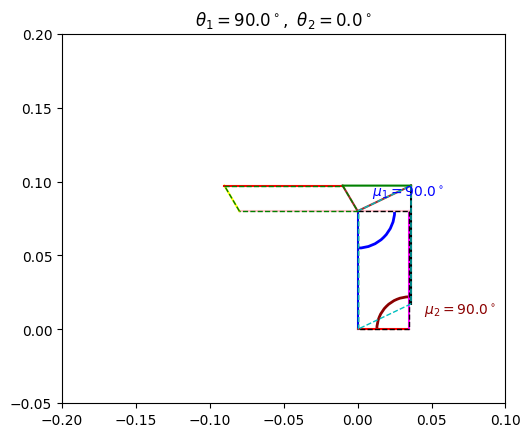

In [22]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

def update(i):
    ax.clear()

    theta1_val = theta1_vals[i]
    theta2_val = theta2_vals[i]
    theta_u_val = theta_u_hist[i]

    joint_values = [
        theta1_val,
        theta2_val,
        *theta_u_val
    ]

    plotMechanismTrans4(joint_values, ax)

    ax.set_title(
        rf"$\theta_1={np.rad2deg(theta1_val):.1f}^\circ,\ "
        rf"\theta_2={np.rad2deg(theta2_val):.1f}^\circ$"
    )

anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(tList),
    interval=80,
    repeat=False
)

In [23]:
HTML(anim.to_jshtml())

In [24]:
# Esto es para guardarlo en .gif
# anim.save("mechanism.gif", writer="pillow", fps=15)

In [25]:
# Esto es para guardarlo en .mp4
# anim.save("mechanism.mp4", writer="ffmpeg",fps=30)

# Paso 2 - Dinámica Inversa
En dinámica las incognitas son los momentos y fuerzas, por la cantidad de cuerpos (4) podemos entonces encontar 12 ecuaciones en el sistema, las cuales tenemos que escribir.

In [26]:
points={'A': 0*T.x, 'B': rAB, 'C': rAC, 'D': rAC+rCD, 'E': rAE, 'F': rAE+rEF, 'G': rAB+rBG, 'H': rAB-rIB+rIH, 'I': rAB-rIB}

com = {'J': rAB/2,

    'K': rAC/2,
    'L': rAC+(rCD/2),
    'M': rAE+(rEF/2), 
    'N': rAB+(rBF/3)+(rBG/3),
    'O': rAB-rIB+rIH+(rHG/2),
    'P': rAC+rCD+(-(rBD+rIB)/2),
    'Q': rAB-rIB+(rIH/2),
    }

com_fun = {

    k: lambdify(

        [theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8],

        [v.dot(T.x).subs(params), v.dot(T.y).subs(params)],

        modules="numpy"

    )

    for k, v in com.items()

}

In [27]:
def plotMechanismCOM(joint_values, ax=None, show_labels=True):
    plotMechanism(joint_values, ax)
    if ax is None:
        ax = plt.gca()
    for name, f in com_fun.items():
        x, y = f(*joint_values)
        ax.plot(x, y, 'ko', markersize=5) # punto negro
        if show_labels:
            ax.text(
                x + 0.003,
                y + 0.003,
                f'COM {name}',
                fontsize=8,
                color='black'
            )

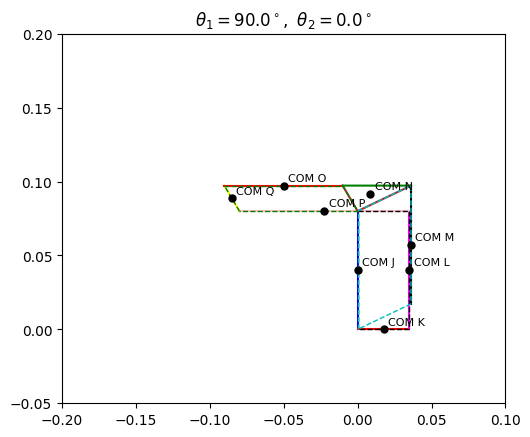

In [28]:
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    theta1_val = theta1_vals[i]
    theta2_val = theta2_vals[i]
    theta_u_val = theta_u_hist[i]
    joint_values = [
        theta1_val,
        theta2_val,
        *theta_u_val
    ]
    plotMechanismCOM(joint_values, ax)
    ax.set_title(
        rf"$\theta_1={np.rad2deg(theta1_val):.1f}^\circ,\ "
        rf"\theta_2={np.rad2deg(theta2_val):.1f}^\circ$"
    )
anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(tList),
    interval=80,
    repeat=False
)

In [29]:
acc = {
    k: v.diff(t, T).diff(t, T)
    for k, v in com.items()
}

weights = {
    'J': -mJ*g*T.y,
    'K': -mK*g*T.y,
    'L': -mL*g*T.y,
    'M': -mM*g*T.y,
    'N': -mN*g*T.y,
    'O': -mO*g*T.y,
    'P': -mP*g*T.y,
    'Q': -mQ*g*T.y
}


inertia_G = {
    'J': (1/12)*mJ*l2**2,
    'K': (1/12)*mK*l1**2,
    'L': (1/12)*mL*l3**2,
    'M': (1/12)*mM*l3**2,
    'N': (1/18)*mN*(l6**2 + l7**2),
    'O': (1/12)*mO*l3**2,
    'P': (1/12)*mP*(l3+l4)**2,
    'Q': (1/12)*mQ*l5**2
}

alpha = {
    'J': J.ang_acc_in(T).dot(T.z),
    'K': K.ang_acc_in(T).dot(T.z),
    'L': L.ang_acc_in(T).dot(T.z),
    'M': M.ang_acc_in(T).dot(T.z),
    'N': N.ang_acc_in(T).dot(T.z),
    'O': O.ang_acc_in(T).dot(T.z),
    'P': P.ang_acc_in(T).dot(T.z),
    'Q': Q.ang_acc_in(T).dot(T.z)
}



In [30]:
# Fuerzas expresadas en el marco T

FTJ = F_TJx*T.x + F_TJy*T.y
FTK = F_TKx*T.x + F_TKy*T.y
FKL = F_KLx*T.x + F_KLy*T.y
FTM = F_TMx*T.x + F_TMy*T.y

FNO = F_NOx*T.x + F_NOy*T.y
FOQ = F_OQx*T.x + F_OQy*T.y

FQP = F_QPx*T.x + F_QPy*T.y
FJP = F_JPx*T.x + F_JPy*T.y
FLP = F_LPx*T.x + F_LPy*T.y

FJN = F_JNx*T.x + F_JNy*T.y
FMN = F_MNx*T.x + F_MNy*T.y



In [31]:
# CUERPO J
r_GJ_A = points['A'] - com['J']
r_GJ_B = points['B'] - com['J']

# CUERPO K
r_GK_A = points['A'] - com['K']
r_GK_C = points['C'] - com['K']

# CUERPO L
r_GL_C = points['C'] - com['L']
r_GL_D = points['D'] - com['L']

# CUERPO M
r_GM_E = points['E'] - com['M']
r_GM_F = points['F'] - com['M']

# CUERPO N
r_GN_B = points['B'] - com['N']
r_GN_F = points['F'] - com['N']
r_GN_G = points['G'] - com['N']

# CUERPO O
r_GO_H = points['H'] - com['O']
r_GO_G = points['G'] - com['O']

# CUERPO P
r_GP_D = points['D'] - com['P']
r_GP_B = points['B'] - com['P']
r_GP_I = points['I'] - com['P']

# CUERPO Q
r_GQ_I = points['I'] - com['Q']
r_GQ_H = points['H'] - com['Q']

In [32]:
# CUERPO J
eqFJx = (+ F_TJx - F_JPx - F_JNx) - mJ*acc['J'].dot(T.x)
eqFJy = ( + F_TJy - F_JPy - F_JNy + weights['J'].dot(T.y) ) - mJ*acc['J'].dot(T.y)
eqMJ = (
    + M_in1
    + r_GJ_A.cross(FTJ).dot(T.z)
    + r_GJ_B.cross(-FJN).dot(T.z)
    + r_GJ_B.cross(-FJP).dot(T.z)
) - inertia_G['J']*alpha['J']
# CUERPO K
eqFKx = ( + F_TKx - F_KLx ) - mK*acc['K'].dot(T.x)
eqFKy = ( + F_TKy - F_KLy + weights['K'].dot(T.y) ) - mK*acc['K'].dot(T.y)
eqMK = (
    + M_in2
    + r_GK_A.cross(FTK).dot(T.z)
    + r_GK_C.cross(-FKL).dot(T.z)
) - inertia_G['K']*alpha['K']
# CUERPO L
eqFLx = ( + F_KLx - F_LPx ) - mL*acc['L'].dot(T.x)
eqFLy = ( + F_KLy - F_LPy + weights['L'].dot(T.y) ) - mL*acc['L'].dot(T.y)
eqML = (
    + r_GL_D.cross(-FLP).dot(T.z)
    + r_GL_C.cross(FKL).dot(T.z)
) - inertia_G['L']*alpha['L']
# CUERPO M
eqFMx = ( + F_TMx - F_MNx ) - mM*acc['M'].dot(T.x)
eqFMy = ( + F_TMy - F_MNy + weights['M'].dot(T.y) ) - mM*acc['M'].dot(T.y)
eqMM = (
    + r_GM_E.cross(FTM).dot(T.z)
    + r_GM_F.cross(-FMN).dot(T.z)
) - inertia_G['M']*alpha['M']
# CUERPO N
eqFNx = ( + F_JNx + F_MNx - F_NOx ) - mN*acc['N'].dot(T.x)
eqFNy = ( + F_JNy + F_MNy - F_NOy + weights['N'].dot(T.y) ) - mN*acc['N'].dot(T.y)
eqMN = (
    + r_GN_G.cross(-FNO).dot(T.z)
    + r_GN_F.cross(FMN).dot(T.z)
    + r_GN_B.cross(FJN).dot(T.z)
) - inertia_G['N']*alpha['N']
# CUERPO O
eqFOx = ( + F_NOx - F_OQx ) - mO*acc['O'].dot(T.x)
eqFOy = ( + F_NOy - F_OQy + weights['O'].dot(T.y) ) - mO*acc['O'].dot(T.y)
eqMO = (
    + r_GO_G.cross(FNO).dot(T.z)
    + r_GO_H.cross(-FOQ).dot(T.z)
) - inertia_G['O']*alpha['O']
# CUERPO P
eqFPx = ( + F_QPx + F_JPx + F_LPx ) - mP*acc['P'].dot(T.x)
eqFPy = ( + F_QPy + F_JPy + F_LPy + weights['P'].dot(T.y) ) - mP*acc['P'].dot(T.y)
eqMP = (
    + r_GP_I.cross(FQP).dot(T.z)
    + r_GP_B.cross(FJP).dot(T.z)
    + r_GP_D.cross(FLP).dot(T.z)
) - inertia_G['P']*alpha['P']
# CUERPO Q
eqFQx = ( + F_OQx - F_QPx ) - mQ*acc['Q'].dot(T.x)
eqFQy = ( + F_OQy - F_QPy + weights['Q'].dot(T.y) ) - mQ*acc['Q'].dot(T.y)
eqMQ = (
    + r_GQ_H.cross(FOQ).dot(T.z)
    + r_GQ_I.cross(-FQP).dot(T.z)
) - inertia_G['Q']*alpha['Q']

In [33]:
eqList = [

    # --- CUERPO J ---
    eqFJx, eqFJy, eqMJ,

    # --- CUERPO K ---
    eqFKx, eqFKy, eqMK,

    # --- CUERPO L ---
    eqFLx, eqFLy, eqML,

    # --- CUERPO M ---
    eqFMx, eqFMy, eqMM,

    # --- CUERPO N ---
    eqFNx, eqFNy, eqMN,

    # --- CUERPO O ---
    eqFOx, eqFOy, eqMO,

    # --- CUERPO P ---
    eqFPx, eqFPy, eqMP,

    # --- CUERPO Q ---
    eqFQx, eqFQy, eqMQ,
]

In [34]:
unknowns = [

    # Fuerzas TJ
    F_TJx, F_TJy,

    # Fuerzas JP
    F_JPx, F_JPy,

    # Fuerzas JN
    F_JNx, F_JNy,

    # Fuerzas TK
    F_TKx, F_TKy,

    # Fuerzas KL
    F_KLx, F_KLy,

    # Fuerzas LP
    F_LPx, F_LPy,

    # Fuerzas TM
    F_TMx, F_TMy,

    # Fuerzas MN
    F_MNx, F_MNy,

    # Fuerzas NO
    F_NOx, F_NOy,

    # Fuerzas OQ
    F_OQx, F_OQy,

    # Fuerzas QP
    F_QPx, F_QPy,

    # Momentos externos
    M_in1, M_in2
]

In [35]:
display(len(eqList))
display(len(unknowns))

24

24

In [36]:
FF, bf = linear_eq_to_matrix(eqList, unknowns)

In [37]:
FF.subs(params)

Matrix([
[                  1,                    0,                                                                                        -1,                                                                                        0,                                                                                                                           -1,                                                                                                                           0,                     0,                      0,                     0,                      0,                      0,                     0,                   0,                    0,                                                                                                                                                                                 0,                                                                                                                                                         

In [38]:
bf.subs(params)

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                     -0.000564*sin(theta1(t))*Derivative(theta1(t), (t, 2)) - 0.000564*cos(theta1(t))*Derivative(theta1(t), t)**2],
[                                                                                                                                                                                                                                                                                                                                                                                          -0.000564*sin(theta1(t))*Derivative(theta1(t), t)**2 + 0.000564*cos(theta1(t))*Derivative(theta1(t), (t, 2)) + 

In [39]:
FF.shape, bf.shape


((24, 24), (24, 1))

In [40]:
dyn_vars = [
    theta1, theta2, theta3, theta4,
    theta5, theta6, theta7, theta8,
    theta1.diff(t), theta2.diff(t), theta3.diff(t), theta4.diff(t),
    theta5.diff(t), theta6.diff(t), theta7.diff(t), theta8.diff(t),
    theta1.diff(t,2), theta2.diff(t,2), theta3.diff(t,2), theta4.diff(t,2),
    theta5.diff(t,2), theta6.diff(t,2), theta7.diff(t,2), theta8.diff(t,2)
]


In [41]:
FF_fun = lambdify(
    dyn_vars,
    FF.subs(params),
    modules="numpy"
)

bf_fun = lambdify(
    dyn_vars,
    bf.subs(params),
    modules="numpy"
)

# Paso 2.1 Sidequest para levantar FK, FV y FA

## FV

In [42]:
eqLoop1_v = eqLoop1.diff(t, T)
eqLoop2_v = eqLoop2.diff(t, T)
eqLoop3_v = eqLoop3.diff(t, T)

eqs_v = [
    eqLoop1_v.dot(T.x), eqLoop1_v.dot(T.y),
    eqLoop2_v.dot(T.x), eqLoop2_v.dot(T.y),
    eqLoop3_v.dot(T.x), eqLoop3_v.dot(T.y),
]

eqs_v_fun = lambdify(
    (
        theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8,
        theta1.diff(t), theta2.diff(t),
        theta3.diff(t), theta4.diff(t), theta5.diff(t),
        theta6.diff(t), theta7.diff(t), theta8.diff(t)
    ),
    eqs_v,
    'numpy'
)

In [43]:
def FV(theta_vals, theta_dot_known, guess):
    """
    Resuelve velocidades desconocidas theta_dot_u
    """

    theta1_val, theta2_val = theta_vals[:2]
    theta_u_vals = theta_vals[2:]

    theta1_dot, theta2_dot = theta_dot_known

    def residual(theta_dot_u):
        theta3_dot, theta4_dot, theta5_dot, theta6_dot, theta7_dot, theta8_dot = theta_dot_u

        r = eqs_v_fun(
            theta1_val, theta2_val, *theta_u_vals,
            theta1_dot, theta2_dot,
            theta3_dot, theta4_dot, theta5_dot,
            theta6_dot, theta7_dot, theta8_dot
        )
        return np.array(r, dtype=float)

    def cost(theta_dot_u):
        r = residual(theta_dot_u)
        return np.dot(r, r)

    result = minimize(cost, x0=guess, method='BFGS')

    if not result.success:
        raise RuntimeError("FV no convergió")

    return result.x

In [44]:
theta_dot_u_hist = []

theta_dot_u0 = np.zeros(6)   # buena práctica empezar en cero

for i in range(len(tList)):

    theta_vals = [
        theta1_vals[i],
        theta2_vals[i],
        *theta_u_hist[i]
    ]

    theta_dot_known = [
        theta1_dot_vals[i],
        theta2_dot_vals[i]
    ]

    theta_dot_u_sol = FV(
        theta_vals,
        theta_dot_known,
        theta_dot_u0
    )

    theta_dot_u_hist.append(theta_dot_u_sol)
    theta_dot_u0 = theta_dot_u_sol   # continuation 🔑

In [45]:
np.max(np.abs(theta_dot_u_hist))

np.float64(0.3653884555652061)

## FA

In [46]:
eqLoop1_a = eqLoop1_v.diff(t, T)
eqLoop2_a = eqLoop2_v.diff(t, T)
eqLoop3_a = eqLoop3_v.diff(t, T)

eqs_a = [
    eqLoop1_a.dot(T.x), eqLoop1_a.dot(T.y),
    eqLoop2_a.dot(T.x), eqLoop2_a.dot(T.y),
    eqLoop3_a.dot(T.x), eqLoop3_a.dot(T.y),
]

eqs_a_fun = lambdify(
    (
        theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8,
        theta1.diff(t), theta2.diff(t),
        theta3.diff(t), theta4.diff(t), theta5.diff(t),
        theta6.diff(t), theta7.diff(t), theta8.diff(t),
        theta1.diff(t,2), theta2.diff(t,2),
        theta3.diff(t,2), theta4.diff(t,2), theta5.diff(t,2),
        theta6.diff(t,2), theta7.diff(t,2), theta8.diff(t,2)
    ),
    eqs_a,
    'numpy'
)

In [47]:
def FA(theta_vals, theta_dot_vals, theta_ddot_known, guess):
    """
    Resuelve aceleraciones desconocidas
    """

    theta1_val, theta2_val = theta_vals[:2]
    theta_u_vals = theta_vals[2:]

    theta1_dot, theta2_dot = theta_dot_vals[:2]
    theta_u_dot = theta_dot_vals[2:]

    theta1_ddot, theta2_ddot = theta_ddot_known

    def residual(theta_ddot_u):
        r = eqs_a_fun(
            theta1_val, theta2_val, *theta_u_vals,
            theta1_dot, theta2_dot, *theta_u_dot,
            theta1_ddot, theta2_ddot, *theta_ddot_u
        )
        return np.array(r, dtype=float)

    def cost(theta_ddot_u):
        r = residual(theta_ddot_u)
        return np.dot(r, r)

    result = minimize(cost, x0=guess, method='BFGS')

    if not result.success:
        raise RuntimeError("FA no convergió")

    return result.x

In [48]:
theta_u_hist      = []
theta_dot_u_hist  = []
theta_ddot_u_hist = []

theta_u0      = np.deg2rad([80, 60, 0, 30, 30, 90])
theta_dot_u0  = np.zeros(6)
theta_ddot_u0 = np.zeros(6)

for i, ti in enumerate(tList):

    # --- entradas conocidas ---
    theta1_val      = theta1_fun(ti)
    theta2_val      = theta2_fun(ti)
    theta1_dot_val  = theta1_dot_fun(ti)
    theta2_dot_val  = theta2_dot_fun(ti)
    theta1_ddot_val = theta1_ddot_fun(ti)
    theta2_ddot_val = theta2_ddot_fun(ti)

    # --- FK ---
    theta_u = FK(theta1_val, theta2_val, theta_u0)
    theta_vals = [theta1_val, theta2_val, *theta_u]

    # --- FV ---
    theta_dot_u = FV(
        theta_vals,
        [theta1_dot_val, theta2_dot_val],
        theta_dot_u0
    )
    theta_dot_vals = [theta1_dot_val, theta2_dot_val, *theta_dot_u]

    # --- FA ---
    theta_ddot_u = FA(
        theta_vals,
        theta_dot_vals,
        [theta1_ddot_val, theta2_ddot_val],
        theta_ddot_u0
    )

    # --- guardar ---
    theta_u_hist.append(theta_u)
    theta_dot_u_hist.append(theta_dot_u)
    theta_ddot_u_hist.append(theta_ddot_u)

    # --- continuation ---
    theta_u0      = theta_u
    theta_dot_u0  = theta_dot_u
    theta_ddot_u0 = theta_ddot_u

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 58
         Function evaluations: 427
         Gradient evaluations: 61
Convergió.
Costo final: 3.0210613693857883e-16
Norma residual: 1.738120067597687e-08
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 392
         Gradient evaluations: 56
Convergió.
Costo final: 2.9019978965478755e-15
Norma residual: 5.387019488128733e-08
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 385
         Gradient evaluations: 55
Convergió.
Costo final: 7.180429605432205e-14
Norma residual: 2.679632363857439e-07
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 385
         Gradient evaluations: 55
Convergió.
Costo final: 6.90146492029392e-14
Norma res

In [49]:
np.max(np.abs(theta_u_hist))

np.float64(2.103412764352872)

In [50]:
theta_vals = np.array([theta1_val, theta2_val, *theta_u])
theta_dot_vals = np.array([theta1_dot_val, theta2_dot_val, *theta_dot_u])
theta_ddot_vals = np.array([theta1_ddot_val, theta2_ddot_val, *theta_ddot_u])

dyn_input = [
    *theta_vals,
    *theta_dot_vals,
    *theta_ddot_vals
]

In [51]:
forces_hist = []

for i, ti in enumerate(tList):

    # --- entradas conocidas ---
    theta1_val      = theta1_fun(ti)
    theta2_val      = theta2_fun(ti)
    theta1_dot_val  = theta1_dot_fun(ti)
    theta2_dot_val  = theta2_dot_fun(ti)
    theta1_ddot_val = theta1_ddot_fun(ti)
    theta2_ddot_val = theta2_ddot_fun(ti)

    # --- FK ---
    theta_u = FK(theta1_val, theta2_val, theta_u0)
    theta_vals = np.array([theta1_val, theta2_val, *theta_u])

    # --- FV ---
    theta_dot_u = FV(
        theta_vals,
        [theta1_dot_val, theta2_dot_val],
        theta_dot_u0
    )
    theta_dot_vals = np.array([theta1_dot_val, theta2_dot_val, *theta_dot_u])

    # --- FA ---
    theta_ddot_u = FA(
        theta_vals,
        theta_dot_vals,
        [theta1_ddot_val, theta2_ddot_val],
        theta_ddot_u0
    )
    theta_ddot_vals = np.array([theta1_ddot_val, theta2_ddot_val, *theta_ddot_u])

    # --- dinámica ---
    dyn_input = [
        *theta_vals,
        *theta_dot_vals,
        *theta_ddot_vals
    ]

    FF_eval = np.array(FF_fun(*dyn_input), dtype=float)
    bf_eval = np.array(bf_fun(*dyn_input), dtype=float)

    lambda_sol = np.linalg.solve(FF_eval, bf_eval)
    lambda_sol = np.array(lambda_sol).flatten() # Flatten para que sean normales
    forces_hist.append(lambda_sol)

    # --- continuation ---
    theta_u0      = theta_u
    theta_dot_u0  = theta_dot_u
    theta_ddot_u0 = theta_ddot_u

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 392
         Gradient evaluations: 56
Convergió.
Costo final: 5.850012400677722e-14
Norma residual: 2.418679888012823e-07
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 51
         Function evaluations: 392
         Gradient evaluations: 56
Convergió.
Costo final: 2.9435848946712334e-15
Norma residual: 5.425481448379704e-08
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 385
         Gradient evaluations: 55
Convergió.
Costo final: 7.17828138024956e-14
Norma residual: 2.679231490605013e-07
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 50
         Function evaluations: 385
         Gradient evaluations: 55
Convergió.
Costo final: 6.90143123449367e-14
Norma resid

In [70]:
forces_hist = np.array(forces_hist)
forces_hist.shape

(120, 24)

In [71]:
forces_dict = {}

for j, var in enumerate(unknowns):
    forces_dict[str(var)] = forces_hist[:, j]

In [72]:
print(forces_dict.keys())

dict_keys(['F_TJx', 'F_TJy', 'F_JPx', 'F_JPy', 'F_JNx', 'F_JNy', 'F_TKx', 'F_TKy', 'F_KLx', 'F_KLy', 'F_LPx', 'F_LPy', 'F_TMx', 'F_TMy', 'F_MNx', 'F_MNy', 'F_NOx', 'F_NOy', 'F_OQx', 'F_OQy', 'F_QPx', 'F_QPy', 'M_in1', 'M_in2'])


In [73]:
forces_dict['M_in1'][0]

np.float64(-7.162398814856961e-08)

In [74]:
forces_hist[0][unknowns.index(M_in1)]

np.float64(-7.162398814856961e-08)

In [75]:
force_names = list(forces_dict.keys())

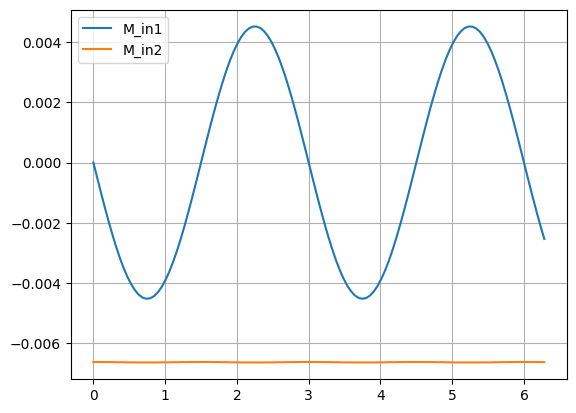

In [76]:
plt.figure()
plt.plot(tList, forces_dict['M_in1'], label='M_in1')
plt.plot(tList, forces_dict['M_in2'], label='M_in2')
plt.legend()
plt.grid()
plt.show()

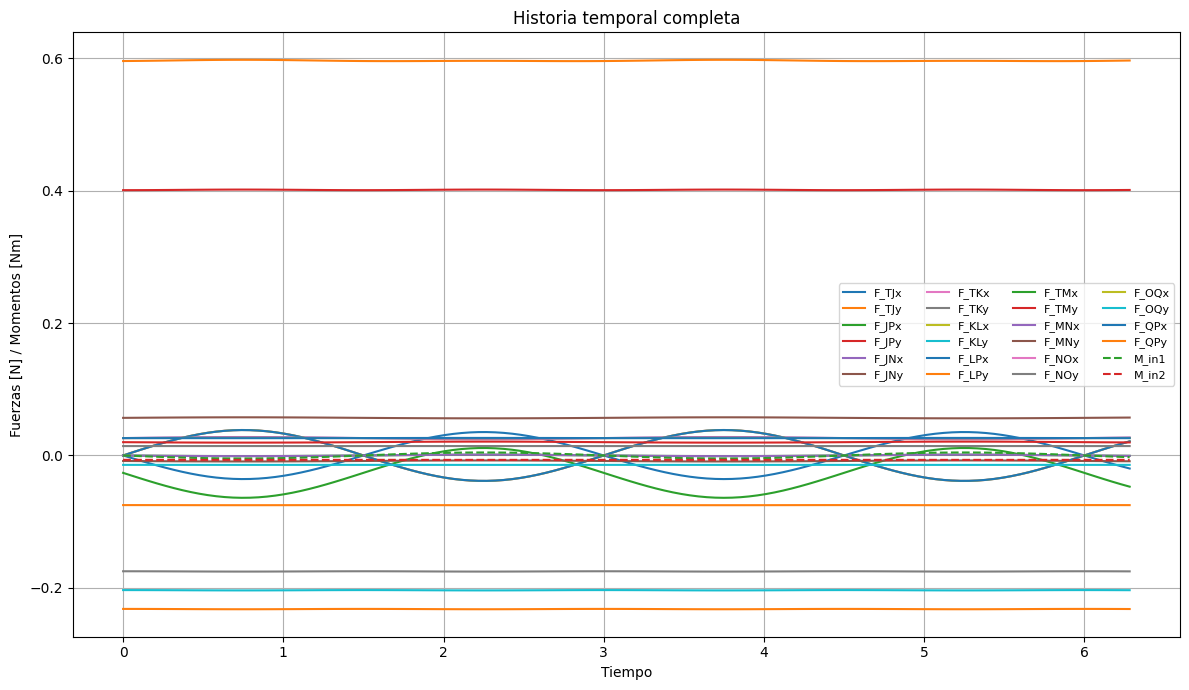

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))

for name, values in forces_dict.items():
    
    if name.startswith("M"):      # momentos
        plt.plot(tList, values, '--', label=name)
    else:                         # fuerzas
        plt.plot(tList, values, '-', label=name)

plt.xlabel("Tiempo")
plt.ylabel("Fuerzas [N] / Momentos [Nm]")
plt.title("Historia temporal completa")
plt.legend(ncol=4, fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

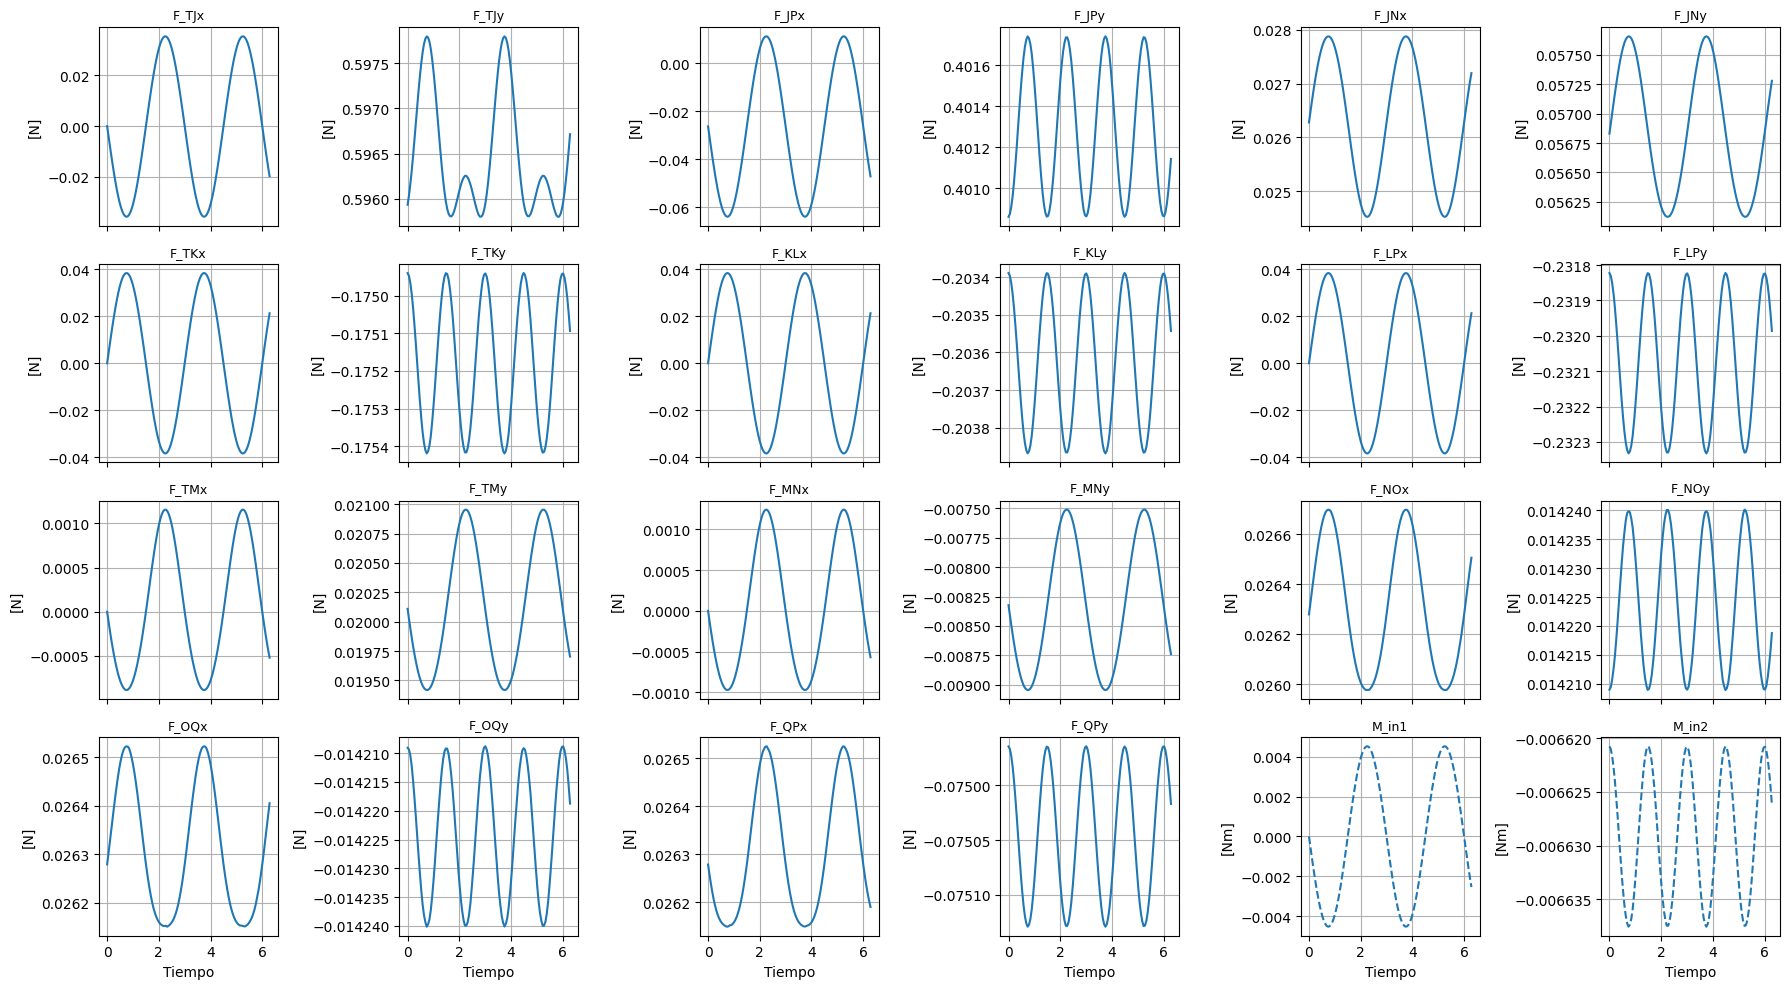

In [78]:
fig, axes = plt.subplots(4, 6, figsize=(18,10), sharex=True)
axes = axes.flatten()

for i, name in enumerate(force_names):

    ax = axes[i]
    values = forces_dict[name]

    if name.startswith("M"):
        ax.plot(tList, values, '--')
        ax.set_ylabel("[Nm]")
    else:
        ax.plot(tList, values, '-')
        ax.set_ylabel("[N]")

    ax.set_title(name, fontsize=9)
    ax.grid(True)

# Etiqueta común abajo
for ax in axes[-6:]:
    ax.set_xlabel("Tiempo")

plt.tight_layout()
plt.show()

In [103]:
# ==========================================================
# FORWARD DYNAMICS (RAGDOLL – M_in1 = M_in2 = 0)
# ==========================================================

import sympy as sp
import numpy as np
from sympy import linear_eq_to_matrix, lambdify
from scipy.integrate import solve_ivp

# ----------------------------------------------------------
# 1) Crear símbolos normales para aceleraciones
# ----------------------------------------------------------

theta1_ddot_s, theta2_ddot_s, theta3_ddot_s, theta4_ddot_s, \
theta5_ddot_s, theta6_ddot_s, theta7_ddot_s, theta8_ddot_s = sp.symbols(
    'theta1_ddot_s theta2_ddot_s theta3_ddot_s theta4_ddot_s '
    'theta5_ddot_s theta6_ddot_s theta7_ddot_s theta8_ddot_s'
)

theta_ddot_syms = [
    theta1_ddot_s, theta2_ddot_s, theta3_ddot_s, theta4_ddot_s,
    theta5_ddot_s, theta6_ddot_s, theta7_ddot_s, theta8_ddot_s
]

# ----------------------------------------------------------
# 2) Sustituir theta.diff(t,2) por símbolos normales
# ----------------------------------------------------------

subs_ddot = {
    theta1.diff(t,2): theta1_ddot_s,
    theta2.diff(t,2): theta2_ddot_s,
    theta3.diff(t,2): theta3_ddot_s,
    theta4.diff(t,2): theta4_ddot_s,
    theta5.diff(t,2): theta5_ddot_s,
    theta6.diff(t,2): theta6_ddot_s,
    theta7.diff(t,2): theta7_ddot_s,
    theta8.diff(t,2): theta8_ddot_s,
}

eqs_FD = [eq.subs(subs_ddot) for eq in eqList]

# ----------------------------------------------------------
# 3) Momentos externos = 0 (ragdoll)
# ----------------------------------------------------------

eqs_FD = [
    eq.subs({
        M_in1: 0,
        M_in2: 0
    })
    for eq in eqs_FD
]

# ----------------------------------------------------------
# 4) Unknowns = fuerzas + aceleraciones
# ----------------------------------------------------------

unknowns_FD = [
    F_TJx, F_TJy, F_JPx, F_JPy, F_JNx, F_JNy,
    F_TKx, F_TKy, F_KLx, F_KLy, F_LPx, F_LPy,
    F_TMx, F_TMy, F_MNx, F_MNy,
    F_NOx, F_NOy, F_OQx, F_OQy,
    F_QPx, F_QPy,
    *theta_ddot_syms
]

# ----------------------------------------------------------
# 5) Sistema lineal
# ----------------------------------------------------------

FF_FD, bf_FD = linear_eq_to_matrix(eqs_FD, unknowns_FD)

# ----------------------------------------------------------
# 6) Lambdify usando param_vals (IMPORTANTE)
# ----------------------------------------------------------

FF_FD_num = FF_FD.subs(param_vals)
bf_FD_num = bf_FD.subs(param_vals)

dyn_vars_FD = [
    theta1, theta2, theta3, theta4,
    theta5, theta6, theta7, theta8,

    theta1.diff(t), theta2.diff(t), theta3.diff(t), theta4.diff(t),
    theta5.diff(t), theta6.diff(t), theta7.diff(t), theta8.diff(t),

    *theta_ddot_syms
]

FF_FD_fun = sp.lambdify(dyn_vars_FD, FF_FD_num, 'numpy')
bf_FD_fun = sp.lambdify(dyn_vars_FD, bf_FD_num, 'numpy')

# ----------------------------------------------------------
# 7) RHS para integración (todo forzado a float)
# ----------------------------------------------------------

def FD_rhs(ti, x):

    theta_vals = x[:8]
    theta_dot_vals = x[8:]

    theta_ddot_guess = np.zeros(8)

    dyn_input = [
        *theta_vals,
        *theta_dot_vals,
        *theta_ddot_guess
    ]

    FF_eval = np.array(FF_FD_fun(*dyn_input), dtype=np.float64)
    bf_eval = np.array(bf_FD_fun(*dyn_input), dtype=np.float64)

    sol = np.linalg.solve(FF_eval, bf_eval).flatten()

    theta_ddot = sol[-8:]

    return np.hstack([theta_dot_vals, theta_ddot])

# ----------------------------------------------------------
# 7) RHS para integración
# ----------------------------------------------------------

def FD_rhs(ti, x):

    theta_vals = x[:8]
    theta_dot_vals = x[8:]

    theta_ddot_guess = np.zeros(8)

    dyn_input = [
        *theta_vals,
        *theta_dot_vals,
        *theta_ddot_guess
    ]

    FF_eval = np.array(FF_FD_fun(*dyn_input), dtype=float)
    bf_eval = np.array(bf_FD_fun(*dyn_input), dtype=float)

    sol = np.linalg.solve(FF_eval, bf_eval).flatten()

    theta_ddot = sol[-8:]

    return np.hstack([theta_dot_vals, theta_ddot])

# ----------------------------------------------------------
# 8) Condiciones iniciales
# ----------------------------------------------------------

theta1_0 = theta1_fun(tList[0])
theta2_0 = theta2_fun(tList[0])
theta3_0, theta4_0, theta5_0, theta6_0, theta7_0, theta8_0 = theta_u_hist[0]

theta_dot_0 = np.zeros(8)

x0 = np.hstack([
    [
        theta1_0, theta2_0,
        theta3_0, theta4_0,
        theta5_0, theta6_0,
        theta7_0, theta8_0
    ],
    theta_dot_0
])

# ----------------------------------------------------------
# 9) Integrar
# ----------------------------------------------------------

sol = solve_ivp(
    FD_rhs,
    t_span=(0, 2),
    y0=x0,
    t_eval=np.linspace(0, 2, 200),
    method='RK45'
)

# ----------------------------------------------------------
# 10) Animación ragdoll
# ----------------------------------------------------------

theta_sol = sol.y[:8, :].T

fig, ax = plt.subplots()

def update(i):
    ax.clear()
    plotMechanism(theta_sol[i], ax)
    ax.set_title(f"t = {sol.t[i]:.2f}")
    ax.set_aspect('equal')

anim = animation.FuncAnimation(
    fig,
    update,
    frames=len(sol.t),
    interval=40,
    repeat=False
)

HTML(anim.to_jshtml())

NameError: name 'param_vals' is not defined

# Extra - FD 

In [85]:
import sympy as sp
import numpy as np
from sympy import linear_eq_to_matrix, lambdify
from scipy.integrate import solve_ivp

# Aceleraciones como símbolos normales
theta1_ddot, theta2_ddot, theta3_ddot, theta4_ddot, \
theta5_ddot, theta6_ddot, theta7_ddot, theta8_ddot = sp.symbols(
    'theta1_ddot theta2_ddot theta3_ddot theta4_ddot '
    'theta5_ddot theta6_ddot theta7_ddot theta8_ddot'
)

theta_ddot_syms = [
    theta1_ddot, theta2_ddot, theta3_ddot, theta4_ddot,
    theta5_ddot, theta6_ddot, theta7_ddot, theta8_ddot
]

In [86]:
subs_ddot = {
    theta1.diff(t,2): theta1_ddot,
    theta2.diff(t,2): theta2_ddot,
    theta3.diff(t,2): theta3_ddot,
    theta4.diff(t,2): theta4_ddot,
    theta5.diff(t,2): theta5_ddot,
    theta6.diff(t,2): theta6_ddot,
    theta7.diff(t,2): theta7_ddot,
    theta8.diff(t,2): theta8_ddot,
}

eqs_FD = [eq.subs(subs_ddot) for eq in eqs_FD]

In [87]:
unknowns_FD = [
    # Fuerzas (usa exactamente las tuyas reales)
    F_TJx, F_TJy, F_JPx, F_JPy, F_JNx, F_JNy,
    F_TKx, F_TKy, F_KLx, F_KLy, F_LPx, F_LPy,
    F_TMx, F_TMy, F_MNx, F_MNy,
    F_NOx, F_NOy, F_OQx, F_OQy,
    F_QPx, F_QPy,

    # Aceleraciones ahora incógnitas
    *theta_ddot_syms
]

In [88]:
FF_FD, bf_FD = linear_eq_to_matrix(eqs_FD, unknowns_FD)

In [89]:
dyn_vars_FD = [
    theta1, theta2, theta3, theta4,
    theta5, theta6, theta7, theta8,

    theta1.diff(t), theta2.diff(t), theta3.diff(t), theta4.diff(t),
    theta5.diff(t), theta6.diff(t), theta7.diff(t), theta8.diff(t),

    *theta_ddot_syms
]

In [90]:
FF_FD_fun = lambdify(dyn_vars_FD, FF_FD.subs(params), 'numpy')
bf_FD_fun = lambdify(dyn_vars_FD, bf_FD.subs(params), 'numpy')

In [91]:
def FD_rhs(ti, x):

    theta_vals = x[:8]
    theta_dot_vals = x[8:]

    # En dinámica libre sin actuadores
    theta_ddot_guess = np.zeros(8)

    dyn_input = [
        *theta_vals,
        *theta_dot_vals,
        *theta_ddot_guess
    ]

    FF = np.array(FF_FD_fun(*dyn_input), dtype=float)
    bf = np.array(bf_FD_fun(*dyn_input), dtype=float)

    sol = np.linalg.solve(FF, bf).flatten()

    # Últimas 8 incógnitas son aceleraciones
    theta_ddot = sol[-8:]

    return np.hstack([theta_dot_vals, theta_ddot])

In [ ]:
# ángulos iniciales (t = tList[0])
theta1_0 = theta1_fun(tList[0])
theta2_0 = theta2_fun(tList[0])

theta3_0, theta4_0, theta5_0, theta6_0, theta7_0, theta8_0 = theta_u_hist[0]

# velocidades iniciales
theta_dot_0 = np.zeros(8)

# estado inicial para FD
x0 = np.hstack([
    [
        theta1_0, theta2_0,
        theta3_0, theta4_0,
        theta5_0, theta6_0,
        theta7_0, theta8_0
    ],
    theta_dot_0
])

In [96]:
sol = solve_ivp(
    FD_rhs,
    t_span=(0, 2),
    y0=x0,
    t_eval=np.linspace(0, 2, 150),
    method='RK45'
)

TypeError: _lambdifygenerated() missing 8 required positional arguments: 'theta1_ddot', 'theta2_ddot', 'theta3_ddot', 'theta4_ddot', 'theta5_ddot', 'theta6_ddot', 'theta7_ddot', and 'theta8_ddot'

In [95]:
theta_sol = sol.y[:8, :].T       # (nt, 8)
theta_dot_sol = sol.y[8:, :].T   # (nt, 8)

NameError: name 'sol' is not defined

In [ ]:
fig, ax = plt.subplots()

def update(i):
    ax.clear()
    plotMechanism(sol.y[:8, i], ax)
    ax.set_title(f"t = {sol.t[i]:.2f}s")
    ax.set_aspect('equal')
    ax.set_xlim(-0.25, 0.15)
    ax.set_ylim(-0.25, 0.15)

anim = animation.FuncAnimation(
    fig, update,
    frames=len(sol.t),
    interval=60
)

HTML(anim.to_jshtml())